In [2]:
# You can import *ANYTHING* you want here.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from tqdm import tqdm # this is just a tool to show a progress bar as your simulations are running

# Assignment 7: Comparing Tree Models

Simulation is an incredibly useful tool in data science.  We can use simulation to evaluate how algorithms perform against ground truth, and how algorithms compare to one another.

In this assignment, you will be implementing and extending the nested spheres simulation study found in *Elements of Statistical Learning* page 339. https://web.stanford.edu/~hastie/ElemStatLearn/

# Nested Spheres

Consider a dataset which contains 10 features $X_1 \,, X_2 \,, \cdots \,, X_{10}$.  The features are standard independent Gaussian random variables.  That is to say

$$ X_j \sim \operatorname{Normal}(0,1) \quad \forall j = 1 \dots 10$$

We are going to use these features to study a classification problem.  You will have to create the target variable, $Y$ by computing the following rule:

$$ Y = \begin{cases}  1 \quad \text{ if } \sum_{j=1}^{10} X^2_j>9.34 \\ 0 \quad  \text{ else } \end{cases}$$

# The Simulation Study

Follow these steps to complete the assignment. 

### Part 1 ( X / 25 pts )
Write a function, `generate_data`, that takes a dataset size N and creates a dataset according to the rule above, returning the feature matrix `X` and the labels `y`.

In [3]:
def generate_data(N):
    # Create feature matrix X and labels y
    X = np.random.normal(0, 1, size=(N,10))
    #print(X)

    square_sum = np.sum(X**2, axis=1) #axis=1 allow sum via row
    #print(square_sum)
    
    y = np.where(square_sum>9.34, 1, 0)

    return X,y

#testing
#generate_data(10)

## Part 2 ( X / 25 pts )

Write a function `run_simulation` that accepts two numbers, Ntrain and Ntest. It should generate a training set and testing set using your `generate_data` function and then train **four classifiers**. The first should be a bagged decision tree, the second should be a random forest with `max_features=1`, the third should be a random forest with `max_features=3`, and the fourth can be anything you like, for example a random forest with more features or an XGboost model. Use 500 trees in your random forests and the bagged classifier. The function should return the accuracy for each of these models estimated using the corresponding test set you generated.

In [4]:
def run_simulation(Ntrain,Ntest):
    
    Xtrain, ytrain = generate_data(Ntrain)
    Xtest, ytest = generate_data(Ntest)
    
    #bagged decision tree
    baggedT = BaggingClassifier()
    baggedT.fit(Xtrain, ytrain)
    ypred_baggedT = baggedT.predict(Xtest)
    bag_accuracy = accuracy_score(ytest, ypred_baggedT)
    
    #random forest max_features=1
    randomFone = RandomForestClassifier(n_estimators=500, max_features=1, random_state=0)
    randomFone.fit(Xtrain, ytrain)
    ypred_randomFone = randomFone.predict(Xtest)
    rf_mf1_accuracy = accuracy_score(ytest, ypred_randomFone)
    
    
    #random forest max_features=3
    randomFthree = RandomForestClassifier(n_estimators=500, max_features=3, random_state=0)
    randomFthree.fit(Xtrain, ytrain)
    ypred_randomFthree = randomFthree.predict(Xtest)
    rf_mf3_accuracy = accuracy_score(ytest, ypred_randomFthree)
    
    #random forest max_features=10 (all features)
    randomFall = RandomForestClassifier(n_estimators=500, max_features=10, random_state=0)
    randomFall.fit(Xtrain, ytrain)
    ypred_randomFall = randomFall.predict(Xtest)
    my_classifier_accuracy = accuracy_score(ytest, ypred_randomFall)
    
    
    return bag_accuracy, rf_mf1_accuracy, rf_mf3_accuracy, my_classifier_accuracy

## Part 3 ( X / 25 pts )

Run 50 simulations using a training set of size 1000 and a test set of size 5000 and record all the results in four vectors, one for each type of model. *You should probably debug your code using smaller training and test set sized first because these will take a while. The full simulation takes 10 minutes on my old 2.8GHz core i5 laptop, 5 min on my new-ish M2 MacBook Air.*

In [5]:
#Setup code to record results here:
Nsim = 50 #num of simulation
Ntrain = 1000 #num of train set
Ntest = 5000 #num of test set

#four result vectors
bag_accuracies = []
rf_mf1_accuracies = []
rf_mf3_accuracies = []
rf_mfall_accuracies = []

#Loop to run simulations:
for sim in tqdm(range(Nsim)):
    # Run simulations, collect data
    a,b,c,d = run_simulation(Ntrain, Ntest)
    bag_accuracies.append(a)
    rf_mf1_accuracies.append(b)
    rf_mf3_accuracies.append(c)
    rf_mfall_accuracies.append(d)

print(bag_accuracies)
print(rf_mf1_accuracies)
print(rf_mf3_accuracies)
print(rf_mfall_accuracies)




100%|██████████| 50/50 [05:04<00:00,  6.09s/it]

[0.7792, 0.7618, 0.7804, 0.772, 0.7826, 0.7822, 0.7886, 0.7972, 0.7968, 0.7698, 0.775, 0.79, 0.7624, 0.8032, 0.7878, 0.7852, 0.7634, 0.7916, 0.7984, 0.7754, 0.7834, 0.7892, 0.7582, 0.7866, 0.7512, 0.781, 0.7858, 0.786, 0.8082, 0.7862, 0.7784, 0.7958, 0.7802, 0.7858, 0.7858, 0.765, 0.7886, 0.8074, 0.808, 0.776, 0.7798, 0.7776, 0.7854, 0.7688, 0.784, 0.757, 0.7638, 0.7772, 0.7782, 0.7634]
[0.8698, 0.854, 0.871, 0.852, 0.8624, 0.8524, 0.8784, 0.8642, 0.859, 0.8604, 0.8686, 0.883, 0.8638, 0.8738, 0.8658, 0.8792, 0.8554, 0.865, 0.8778, 0.859, 0.8508, 0.8606, 0.8464, 0.8552, 0.8568, 0.8598, 0.8674, 0.8648, 0.872, 0.8718, 0.8532, 0.8648, 0.8682, 0.8616, 0.8526, 0.8514, 0.8832, 0.8688, 0.8794, 0.8524, 0.8528, 0.8674, 0.873, 0.861, 0.8648, 0.8652, 0.8456, 0.8556, 0.8554, 0.8662]
[0.8492, 0.834, 0.8426, 0.8394, 0.8442, 0.8378, 0.8516, 0.8548, 0.8412, 0.8414, 0.8478, 0.8698, 0.8424, 0.8598, 0.8458, 0.8616, 0.8386, 0.8462, 0.8674, 0.8352, 0.8346, 0.846, 0.8202, 0.8328, 0.815, 0.8458, 0.8378, 0.850

## Part 4 (X / 25 pts) 
Plot the error rates for each model using a boxplot for each one. The four models should be across the x-axis, and the y-axis should be test accuracy.

Text(0, 0.5, 'Test accuracy')

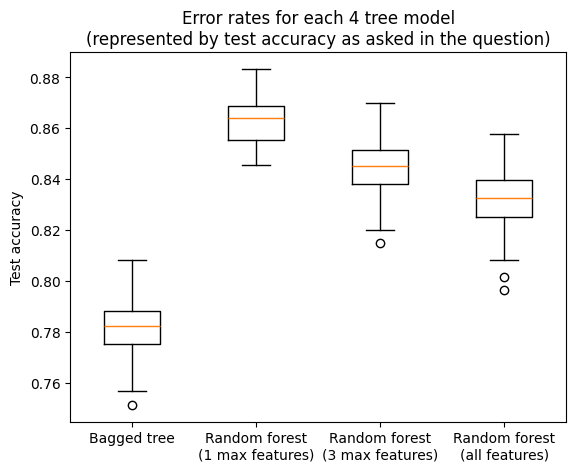

In [ ]:
#convert to np array for easier manipulation
bag_accuracies = np.array(bag_accuracies)
rf_mf1_accuracies = np.array(rf_mf1_accuracies)
rf_mf3_accuracies = np.array(rf_mf3_accuracies)
rf_mfall_accuracies = np.array(rf_mfall_accuracies)
all_testAccuracy = [bag_accuracies, rf_mf1_accuracies, rf_mf3_accuracies, rf_mfall_accuracies]

#calc error rate (question is vague on what to show. this is to calculate error rate)
bag_errorR = 1 - bag_accuracies
rf_mf1_errorR = 1 - rf_mf1_accuracies
rf_mf3_errorR = 1 - rf_mf3_accuracies
rf_mfall_errorR = 1 - rf_mfall_accuracies
all_errorR = [bag_errorR, rf_mf1_errorR, rf_mf3_errorR, rf_mfall_errorR]

#Plot the error rates as a box plot by model to complete the assignment.
#test rate (asked in the question) on y axis
plt.boxplot(all_testAccuracy, tick_labels=["Bagged tree", "Random forest\n(1 max features)", "Random forest\n(3 max features)", "Random forest\n(all features)"])
plt.title("Error rates for each 4 tree model\n(represented by test accuracy as asked in the question)")
plt.ylabel("Test accuracy")

# #error rate (for validation)
# plt.boxplot(all_errorR, tick_labels=["Bagged tree", "Random forest\n(1 max features)", "Random forest\n(3 max features)", "Random forest\n(all features)"])
# plt.title("Error rates for each 4 tree model\n(showing error rate as asked in the first part of the question. Y axis use calculated error rate - this is not part of the question, but just for validation)")
# plt.ylabel("Error rate")
# plt.show()